In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

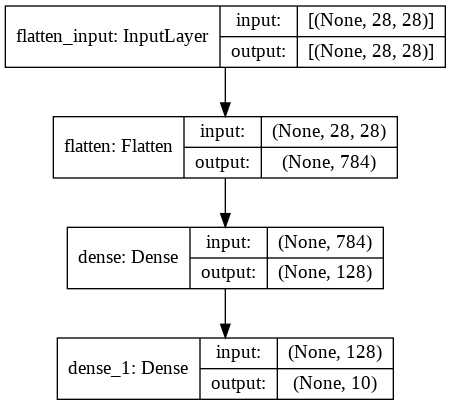

In [ ]:
model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6230 - accuracy: 0.7848
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3827 - accuracy: 0.8617
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3398 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3187 - accuracy: 0.8848
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3478 - accuracy: 0.8765


[0.34775036573410034, 0.8765000104904175]

In [ ]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

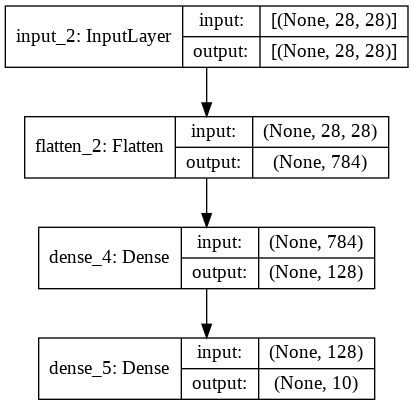

In [ ]:
model = build_model_with_functional()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6348 - accuracy: 0.7802
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3930 - accuracy: 0.8588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3481 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3175 - accuracy: 0.8845
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8738


[0.3599751591682434, 0.8737999796867371]